<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/n7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

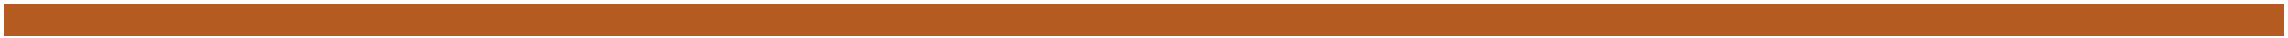

## <font color='#475468'> Bundling Recommendations:</font>
### <font color='#475468'> Can you bundle items that go together based on historical transactions?</font>

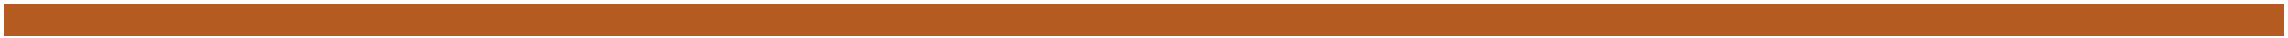

## Initialize

In [2]:
import pandas as pd

## Load Data

Remember the retail transactions data set that we used for customer segmentation...

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfRet = pd.read_csv('/content/drive/MyDrive/Datasets/black_friday_sales_data.csv', encoding = "ISO-8859-1")

In [5]:
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Prepare Data

In order to extract relationships between items, the data is first rearranged into a binary table where each transaction is a row, each column is an item, and the values are set to 1 if the item was part of the transaction.

In [6]:
# Drop missing values
dfRet.dropna(inplace=True)

In [7]:
# Convert to list format
dfRetList=dfRet.groupby('User_ID').Product_ID.apply(list)
dfRetList

User_ID
1000001    [P00248942, P00085942, P00102642, P00110842, P...
1000002    [P00289342, P00034742, P00177442, P00116842, P...
1000003    [P00128042, P00112142, P00182742, P00110742, P...
1000004    [P00184942, P00046742, P00329542, P00114942, P...
1000005    [P00145042, P00324442, P00036842, P00173342, P...
                                 ...                        
1006036    [P00294442, P00118342, P00243942, P00156742, P...
1006037    [P00177442, P00087042, P00025442, P00086442, P...
1006038                    [P00034742, P00086042, P00109542]
1006039    [P00088542, P00254242, P00202742, P00085942, P...
1006040    [P00148642, P00059442, P00024142, P00192042, P...
Name: Product_ID, Length: 5870, dtype: object

## Build Model

In [8]:
# Encode data as transaction matrix
from mlxtend.preprocessing import TransactionEncoder

mdlRetTe = TransactionEncoder()
mdlRetTe_array = mdlRetTe.fit(dfRetList).transform(dfRetList)
dfRtb = pd.DataFrame(mdlRetTe_array, columns=mdlRetTe.columns_)
dfRtb

,P00000142,P00000242,P00000642,P00001042,P00001142,P00001542,P00002142,P00002242,P00003442,P00004242,...,P0096442,P0096542,P0096642,P0096742,P0096842,P0097342,P0099042,P0099742,P0099842,P0099942
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,False,False,True,False,True,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
5866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Determine the items and itemsets with at least 1% support (generates all itemsets and then filters by support)

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(dfRtb, min_support=0.01, use_colnames=True)
frequent_itemsets

KeyboardInterrupt: 

I couldn't do this part, every time I run it it crashes.

In [1]:
!pip3 install mlxtend --upgrade

In [9]:
%%time
# Speed up by using pattern fragment growth method for mining frequent itemsets (uses density to find good itemsets)

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(dfRtb, min_support=0.01, use_colnames=True)
frequent_itemsets

CPU times: user 2min 21s, sys: 798 ms, total: 2min 22s
Wall time: 2min 25s


,support,itemsets
0,0.275128,(P00025442)
1,0.245315,(P00184942)
2,0.239523,(P00059442)
3,0.218228,(P00110842)
4,0.212266,(P00102642)
...,...,...
206858,0.010051,"(P00057442, P00050342)"
206859,0.012266,"(P00050342, P00145042)"
206860,0.010051,"(P00050342, P00034742)"
206861,0.010051,"(P00050342, P00010742)"


In [10]:
# Evaluate the metrics, and filter the items and itemsets that have at least 70% confidence

from mlxtend.frequent_patterns import association_rules

a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
a_rules.sort_values(by=['confidence'],ascending=False,inplace=True)
a_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(P00243942, P00122442, P00073842)",(P00057642),0.014140,0.250426,0.010733,0.759036,3.030981,0.007192,3.110733,0.679684
77,"(P00000142, P00277642, P00129342)",(P00145042),0.013969,0.239523,0.010562,0.756098,3.156680,0.007216,3.117956,0.692891
67,"(P00209742, P00155442)",(P00112542),0.016525,0.192675,0.012436,0.752577,3.905949,0.009252,3.262940,0.756481
84,"(P00032042, P00222942)",(P00145042),0.014991,0.239523,0.011244,0.750000,3.131223,0.007653,3.041908,0.690995
34,"(P00144642, P00112142, P00245642)",(P00110742),0.013629,0.274617,0.010221,0.750000,2.731079,0.006479,2.901533,0.642602


utexas_ds_orie_divider_gray.png